<a href="https://colab.research.google.com/github/tomacro/IntroDataScience/blob/master/Annual_Popular_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's get started by investigating which programming languages developers are focusing on each year between 2017-2020. We will illustrate some principles of the CRISP-DM (Cross-industry standard process for data mining) model for our analysis as well.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Using the Pandas, Numpy, and MatPlotLib libraries

Now we will bring in the datasets from the appropriate years.

In [3]:
# Importing survey results
df_17 = pd.read_csv('data/2017_survey_results_public.csv')
df_18 = pd.read_csv('data/2018_survey_results_public.csv')
df_19 = pd.read_csv('data/2019_survey_results_public.csv')
df_20 = pd.read_csv('data/2020_survey_results_public.csv')

# Importing survey schema
schema_17 = pd.read_csv('data/2017_survey_results_schema.csv')
schema_18 = pd.read_csv('data/2018_survey_results_schema.csv')
schema_19 = pd.read_csv('data/2019_survey_results_schema.csv')
schema_20 = pd.read_csv('data/2020_survey_results_schema.csv')

In [7]:
df_20.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

**CRISP-DM: Business Understanding**

As technology and business markets change, developers must change as well. A language that was popular several years before may have little to no market share now. It is important to know what the industry trends are and how they change.

**CRISP-DM: Data Understanding**

In [12]:
df_20['LanguageWorkedWith'].value_counts().reset_index()

,index,LanguageWorkedWith
0,HTML/CSS;JavaScript;PHP;SQL,1073
1,HTML/CSS;JavaScript,900
2,C#;HTML/CSS;JavaScript;SQL,856
3,C#;HTML/CSS;JavaScript;SQL;TypeScript,754
4,HTML/CSS;JavaScript;TypeScript,697
...,...,...
14251,C#;HTML/CSS;Java;JavaScript;Kotlin;Python;R;SQL,1
14252,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,1
14253,C;C#;C++;HTML/CSS;Java;JavaScript;PHP;R;SQL;Ty...,1
14254,C;C++;HTML/CSS;JavaScript;Python;Ruby;SQL;Type...,1


The datasets provided by Stack Overflow show that developers frequently use several languages. We will need to separate those before we conduct any more analysis.

**CRISP-DM: Data Preparation**

Since we are working with 4 separate data frames, we should build a function that will enable us to separate items from a list. This enables us to efficiently use coding and computing resources with reusable code.

In [15]:
def separate_list(list_input):
    '''
    INPUT - A list containing multiple items joined together.

    OUTPUT - A list containing the items separated out individually.
    '''
    list_new = []
    for language in list_input:
        new_item = language.split(';')
        new_item = map(lambda x: x.strip(), new_item) 
        list_new.extend(list(new_item))

    return list(set(list_new))

Now that we have a function that can effectively process our data to get it into the format that we need, let's build the variables we need for our analysis.

In [31]:
languages_list_17 = list(df_17.groupby(['HaveWorkedLanguage']).mean().index)
langs_17 = separate_list(languages_list_17)
languages_list_18 = list(df_18.groupby(['LanguageWorkedWith']).mean().index)
langs_18 = separate_list(languages_list_18)
languages_list_19 = list(df_19.groupby(['LanguageWorkedWith']).mean().index)
langs_19 = separate_list(languages_list_19)
languages_list_20 = list(df_20.groupby(['LanguageWorkedWith']).mean().index)
langs_20 = separate_list(languages_list_20)

We will use the `total_count` function to parse through these data frames to provide a summation of the instances of each language.

In [35]:
def total_count(df, column_1, column_2, rename_column, possible_vals):
    '''
    Code from: https://github.com/nouman-10/Insights-from-Stackoverflow-Dataset/blob/master/utils.py
    INPUT:
    df - the pandas dataframe you want to search
    column_1 - the column name you want to look through
    column_2 - the column you want to count values from
    rename_column - the column you want the original column_1 renamed to
    possible_vals - a list of strings you want to search for in each row of df[col]
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    df = df[column_1].value_counts().reset_index()
    df.rename(columns={'index': rename_column, column_1: column_2}, inplace=True)
    new_df = defaultdict(int)
    #loop through list of possible values
    for val in possible_vals:
        #loop through rows
        for index in range(df.shape[0]):
            if val in df[rename_column][index]:
                new_df[val] += int(df[column_2][index])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [rename_column, column_2]
    new_df.sort_values('count', ascending=False, inplace=True)
    new_df.set_index(rename_column, inplace=True)
    return new_df

In [40]:
langs_df17 = total_count(df_17, 'HaveWorkedLanguage', 'count', 'Language', langs_17)
langs_df18 = total_count(df_18, 'LanguageWorkedWith', 'count', 'Language', langs_18)
langs_df19 = total_count(df_19, 'LanguageWorkedWith', 'count', 'Language', langs_19)
langs_df20 = total_count(df_20, 'LanguageWorkedWith', 'count', 'Language', langs_20)

In [41]:
langs_df20.head()

,count
Language,
C,46769
Java,45749
JavaScript,38822
HTML/CSS,36181
SQL,31413


Now that our data is in the correct format, we can utilize a bar plot to compare the survey responses visually. To do this, we first need to create a new data frame combining the data from the four years.

In [42]:
langs_17_18 = pd.merge(langs_df17, langs_df18, on='Language')
langs_19_20 = pd.merge(langs_df19, langs_df20, on='Language')
langs_merge = pd.merge(langs_17_18, langs_19_20, on='Language')
langs_merge.columns = ['2017', '2018', '2019', '2020']

langs_merge.head()

,2017,2018,2019,2020
Language,,,,
Java,3837,43844,46695,45749
JavaScript,3135,37376,39487,38822
C,3035,44772,48006,46769
SQL,2560,31047,31777,31413
C#,1866,18849,18130,18041


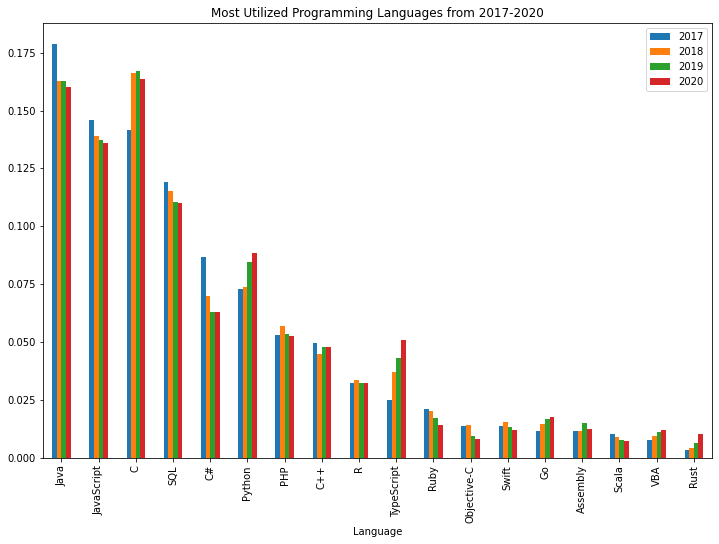

In [43]:
(langs_merge/langs_merge.sum()).plot(kind='bar', title='Most Utilized Programming Languages from 2017-2020', figsize=(12,8))

**CRISP-DM: Evaluation**
From the bar plot, we can see that while Java and JavaScript were incredibly popular in 2017 and 2018, their usage is beginning to diminish slightly, while C and Python are beginning to increase. Both Java and JavaScript are most used for web development, while C and Python are frequently used for backend and analysis. Over the past few years, data science has become incredibly popular. Is there a correlation?